<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных-1-го-региона" data-toc-modified-id="Анализ-данных-1-го-региона-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Анализ данных 1-го региона</a></span></li><li><span><a href="#Анализ-данных-2-го-региона" data-toc-modified-id="Анализ-данных-2-го-региона-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Анализ данных 2-го региона</a></span></li><li><span><a href="#Анализ-данных-3-го-региона" data-toc-modified-id="Анализ-данных-3-го-региона-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Анализ данных 3-го региона</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, и проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Загрузка данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [2]:
# Задаем значения констант
RANDOM_STATE = 42
TEST_SIZE = 0.25

STATE = np.random.RandomState(12345)

In [3]:
# Функция для вывода графика количественных признаков
def graph_quant_feature(df, col_name, col_title):
    
    """
    Функция в качестве аргументов принимает датафрейм, название столбца, для которого необходимо вывести график, 
    и общее название для 2-х графиков. Она выводит гистограмму и диаграмму размаха для полученных данных
    """
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    bins = int(np.log2(len(df[col_name])) + 1)
    
    sns.histplot(df[col_name], bins=bins, ax=axes[0], palette='deep', edgecolor='black')
    axes[0].set_xlabel(f'Количественный признак для столбца \'{col_name}\'')
    axes[0].set_ylabel('Количество месторождений')
    axes[0].set_title('Гистограмма')
    axes[0].grid(True)
    
    sns.boxplot(data=df[col_name], orient='h', ax=axes[1], color='orange')
    axes[1].set_xlabel(f'Количественная характеристика для столбца \'{col_name}\'')
    axes[1].set_title('Диаграмма размаха')
    
    plt.suptitle(col_title)
    plt.show()
    
    print(f'Рассмотрим описательную статистику:\n{df[col_name].describe()}')

In [4]:
# Функция для вывода графика категориальных признаков
def graph_cat_feature(df, col_name, col_title):
      
    """
    Функция в качестве аргументов принимает датафрейм, название столбца, для которого необходимо вывести график, 
    и название самого графика. Она выводит столбчатый график для полученных данных
    """
      
    plt.figure(figsize=(6, 6))
    sns.countplot(data=df, x=col_name, palette='deep', edgecolor='black')
    plt.title(col_title)
    plt.ylabel('Количество месторождений')
    plt.xlabel(f'Значение столбца \'{col_name}\'')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# Функция для построения корреляционной матрицы
def corr_plot(df):
      
    """
    Функция в качестве аргументов принимает датафрейм и строит тепловую карту (heatmap) корреляционной матрицы 
    на основе переданных данных
    """
      
    plt.figure(figsize=(6, 5))
    sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Корреляционная матрица признаков')
    plt.tight_layout()
    plt.show()

In [6]:
# Функция для обучения и проверки модели для каждого региона
def product_predict(df):
    
    """
    Функция принимает на вход датафрейм, содержащий столбцы id, product и признаки f0, f1, f2. 
    Она выполняет разделение данных на обучающую и валидационную выборки, масштабирование признаков 
    с помощью StandardScaler, обучение модели линейной регрессии и предсказание целевого признака. 
    В процессе работы функция возвращает и выводит формы выборок, таблицу с предсказанными и фактическими 
    значениями (y_pred и y_valid), значение метрики RMSE, а также средний объём предсказанного сырья.
    """
    
    X = df.drop(['id', 'product'], axis=1)
    y = df['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    print('Формы тренировочной и тестовой выборок: ', X_train.shape, X_valid.shape)
    
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    result_df = pd.concat([pd.Series(y_pred.round(2), name='y_pred'),
                           pd.Series(y_valid.values.round(2), name='y_valid')], axis=1)

    print(result_df.head())
    
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print('RMSE:', rmse.round(2))

    avg_product_stock = y_pred.sum() / len(y_pred)
    print('Cредний запас предсказанного сырья:', avg_product_stock.round(2), '\n')
    
    return y_pred, y_valid, rmse, avg_product_stock

In [7]:
# Функция для подсчёта прибыли по 200 отобранным скважинам
def calculate_profit(y_pred, y_valid, num_top_wells, income_per_unit, campaign_budget):
    
    """
    Функция calculate_profit принимает на вход массив предсказанных значений, фактические значения целевого 
    признака, количество лучших скважин для выбора, доход с одной единицы продукции и общий бюджет кампании. 
    Она формирует датафрейм с предсказаниями и реальными значениями, выбирает заданное число скважин 
    с наибольшими предсказанными значениями, рассчитывает суммарный фактический объём сырья для этих скважин, 
    умножает его на доход с единицы продукции и вычитает из этого бюджета кампании. Возвращает итоговую прибыль.
    """
    
    combined_df = pd.DataFrame({'y_pred': y_pred, 'y_valid': y_valid.values})
    
    top_wells = combined_df.sort_values(by='y_pred', ascending=False)[:num_top_wells]
    
    total_profit = top_wells['y_valid'].sum() * income_per_unit - campaign_budget
    
    return total_profit

In [8]:
# Функция для вывода прибыли, доверительного интервала и риска убытков для определенного региона
def regional_analytics(y_pred, y_valid, num_top_wells, income_per_unit, campaign_budget, num_research_points, reg_num):
    
    """
    Функция принимает предсказанные значения объёмов сырья, фактические значения, количество отбираемых 
    лучших скважин, доход с одной единицы сырья, бюджет на разработку, количество исследуемых точек 
    в одном регионе и номер региона. С помощью бутстрэп-метода функция 1000 раз случайно выбирает скважины 
    с возвращением, рассчитывает прибыль с учётом выбранных параметров, а затем вычисляет среднюю прибыль, 
    95%-й доверительный интервал и риск убытков. Эти значения выводятся на экран в виде отчёта по региону.
    """
    
    profits = []

    combined = pd.DataFrame({'y_pred': y_pred, 'y_valid': y_valid.values})

    for i in range(1000):
        sample = combined.sample(n=num_research_points, replace=True, random_state=STATE)
        profit = calculate_profit(sample['y_pred'], sample['y_valid'], num_top_wells, 
                                  income_per_unit, campaign_budget)
        profits.append(profit)

    profits = pd.Series(profits)
    
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    
    mean_profit = profits.mean()
    
    risk = (profits < 0).mean()

    print(f'Регион {reg_num}:\n'
          f'Средняя прибыль: {mean_profit.round(2)} руб.\n'
          f'95%-й доверительный интервал: [{lower.round(2)}; {upper.round(2)}] руб.\n'
          f'Риск убытков: {risk:.2%}\n')

In [9]:
# Загружаем данные геологоразведки 1-го региона
geo_data_1 = pd.read_csv('/datasets/geo_data_0.csv')

# Выводим первые 5 строк загруженных данных
geo_data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [10]:
# Выводим основную информацию по загруженным данным
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
# Загружаем данные геологоразведки 2-го региона
geo_data_2 = pd.read_csv('/datasets/geo_data_1.csv')

# Выводим первые 5 строк загруженных данных
geo_data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
# Выводим основную информацию по загруженным данным
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
# Загружаем данные геологоразведки 3-го региона
geo_data_3 = pd.read_csv('/datasets/geo_data_2.csv')

# Выводим первые 5 строк загруженных данных
geo_data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
# Выводим основную информацию по загруженным данным
geo_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Выводы:**
- Нам предоставлены данные о пробах нефти из трёх регионов. В каждом регионе представлено по 100 000 месторождений с измерениями качества нефти и объёма её запасов.
- Значения столбцов:
    - id — уникальный идентификатор скважины;
    - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
    - product — объём запасов в скважине (тыс. баррелей).
- В предоставленных данных отсутствуют пропущенные значения.
- На первый взгляд, данные соответствуют заявленным типам.
- Столбцы оформлены в соответствии с установленными стандартами.

### Предобработка данных

Поиск дубликатов

In [15]:
print(f'В 1-м датафрейме {geo_data_1.duplicated().sum()} явных дубликатов\n'
       f'Во 2-м датафрейме {geo_data_2.duplicated().sum()} явных дубликатов\n'
       f'В 3-м датафрейме {geo_data_3.duplicated().sum()} явных дубликатов')

В 1-м датафрейме 0 явных дубликатов
Во 2-м датафрейме 0 явных дубликатов
В 3-м датафрейме 0 явных дубликатов


Изучим датафреймы на наличие неявных дубликатов

In [16]:
# Рассмотрим число уникальных идентификаторов скважин в 1-м регионе
geo_data_1['id'].nunique()

99990

In [17]:
# Найдем повторяющиеся значения
geo_data_1[geo_data_1.duplicated('id', keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


Поскольку количество таких значений невелико, предлагаю удалить первые строки с повторяющимися id, так как вторые экземпляры геоданных, вероятно, были получены позже и могут быть более актуальными

In [18]:
# Удаляем дубликаты
geo_data_1 = geo_data_1[~geo_data_1.duplicated(subset='id', keep='last')]

In [19]:
# Проверяем правильность преобразований
geo_data_1[geo_data_1.index.isin([66136, 64022, 51970, 3389])]

,id,f0,f1,f2,product
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
66136,74z30,1.084962,-0.312358,6.990771,127.643327


Аналогичные действия проведем с другими датафреймами

In [20]:
# Рассмотрим число уникальных идентификаторов скважин во 2-м регионе
geo_data_2['id'].nunique()

99996

In [21]:
# Найдем повторяющиеся значения
geo_data_2[geo_data_2.duplicated('id', keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [22]:
# Удаляем дубликаты
geo_data_2 = geo_data_2[~geo_data_2.duplicated(subset='id', keep='last')]

In [23]:
# Проверяем правильность преобразований
geo_data_2[geo_data_2.index.isin([5849, 84461, 1305, 41906])]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [24]:
# Рассмотрим число уникальных идентификаторов скважин в 3-м регионе
geo_data_3['id'].nunique()

99996

In [25]:
# Найдем повторяющиеся значения
geo_data_3[geo_data_3.duplicated('id', keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [26]:
# Удаляем дубликаты
geo_data_3 = geo_data_3[~geo_data_3.duplicated(subset='id', keep='last')]

In [27]:
# Проверяем правильность преобразований
geo_data_3[geo_data_3.index.isin([45404, 55967, 11449, 49564])]

,id,f0,f1,f2,product
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


### Исследовательский анализ данных

#### Анализ данных 1-го региона

In [28]:
# Выводим общую информацию
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [29]:
# Рассмотрим описательную статистику
geo_data_1.describe()

,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500412,0.250149,2.502656,92.499482
std,0.871867,0.504434,3.248155,44.289431
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072683,-0.200877,0.287887,56.496838
50%,0.502340,0.250252,2.516005,91.849972
75%,1.073626,0.700654,4.714970,128.564269
max,2.362331,1.343769,16.003790,185.364347


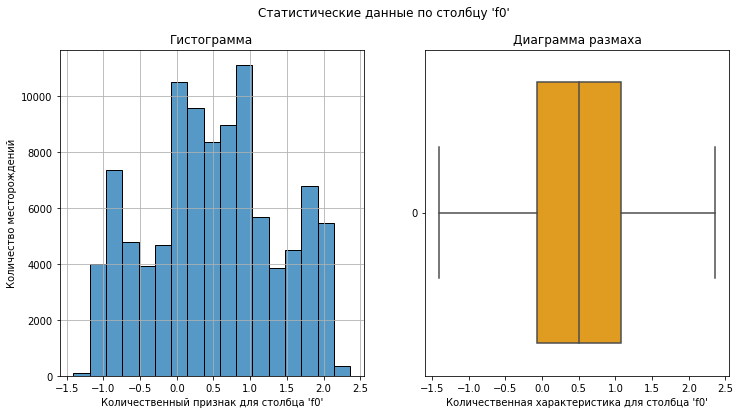

Рассмотрим описательную статистику:
count    99990.000000
mean         0.500412
std          0.871867
min         -1.408605
25%         -0.072683
50%          0.502340
75%          1.073626
max          2.362331
Name: f0, dtype: float64


In [30]:
# Строим график
graph_quant_feature(geo_data_1, 'f0', 'Статистические данные по столбцу \'f0\'')

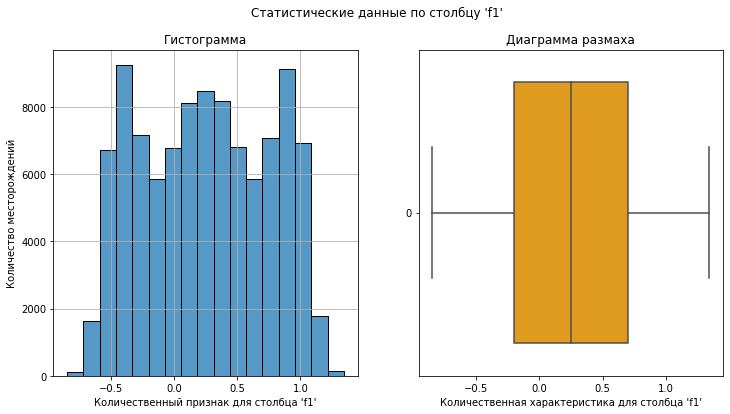

Рассмотрим описательную статистику:
count    99990.000000
mean         0.250149
std          0.504434
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700654
max          1.343769
Name: f1, dtype: float64


In [31]:
# Строим график
graph_quant_feature(geo_data_1, 'f1', 'Статистические данные по столбцу \'f1\'')

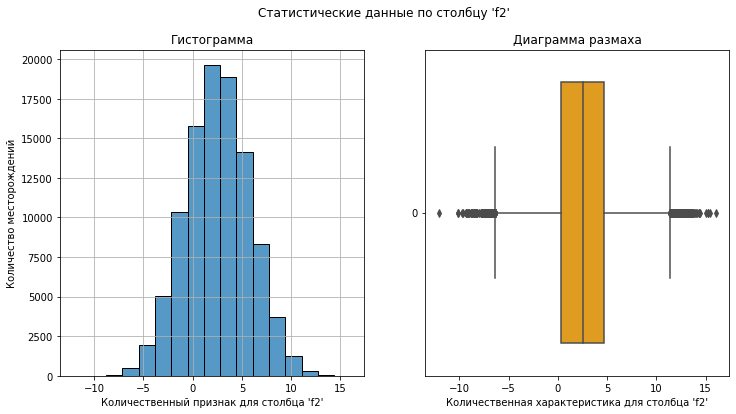

Рассмотрим описательную статистику:
count    99990.000000
mean         2.502656
std          3.248155
min        -12.088328
25%          0.287887
50%          2.516005
75%          4.714970
max         16.003790
Name: f2, dtype: float64


In [32]:
# Строим график
graph_quant_feature(geo_data_1, 'f2', 'Статистические данные по столбцу \'f2\'')

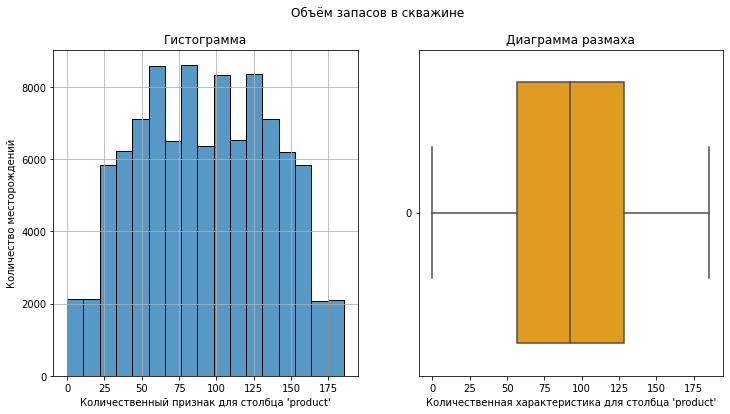

Рассмотрим описательную статистику:
count    99990.000000
mean        92.499482
std         44.289431
min          0.000000
25%         56.496838
50%         91.849972
75%        128.564269
max        185.364347
Name: product, dtype: float64


In [33]:
# Строим график
graph_quant_feature(geo_data_1, 'product', 'Объём запасов в скважине')

Были проанализированы описательные статистики по всем имеющимся данным 1-го региона. Согласно гистограмме, приблизительно нормальное распределение наблюдается лишь у признака *f2*, однако именно он содержит значительное количество выбросов.

#### Анализ данных 2-го региона

In [34]:
# Выводим общую информацию
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [35]:
# Рассмотрим описательную статистику
geo_data_2.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141450,-4.796493,2.494551,68.825232
std,8.965922,5.119900,1.703579,45.944649
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298525,-8.267985,1.000021,26.953261
50%,1.153190,-4.813005,2.011479,57.085625
75%,8.621015,-1.332704,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


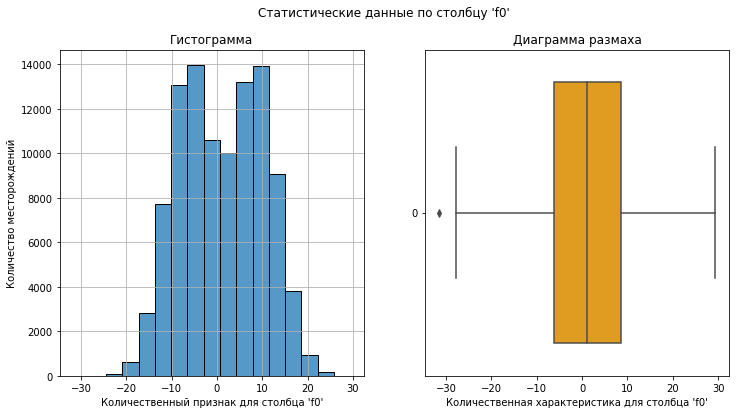

Рассмотрим описательную статистику:
count    99996.000000
mean         1.141450
std          8.965922
min        -31.609576
25%         -6.298525
50%          1.153190
75%          8.621015
max         29.421755
Name: f0, dtype: float64


In [36]:
# Строим график
graph_quant_feature(geo_data_2, 'f0', 'Статистические данные по столбцу \'f0\'')

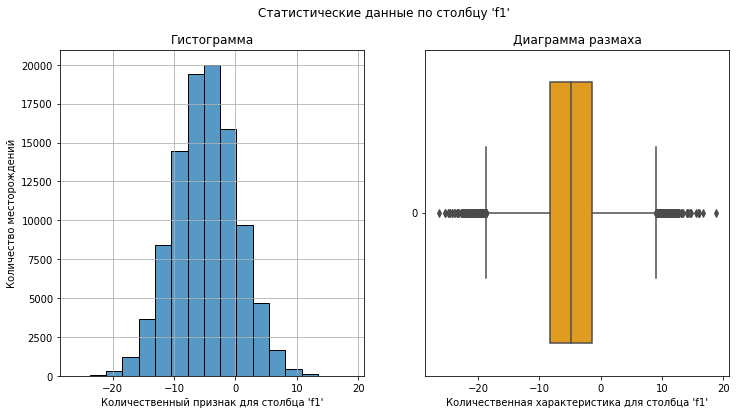

Рассмотрим описательную статистику:
count    99996.000000
mean        -4.796493
std          5.119900
min        -26.358598
25%         -8.267985
50%         -4.813005
75%         -1.332704
max         18.734063
Name: f1, dtype: float64


In [37]:
# Строим график
graph_quant_feature(geo_data_2, 'f1', 'Статистические данные по столбцу \'f1\'')

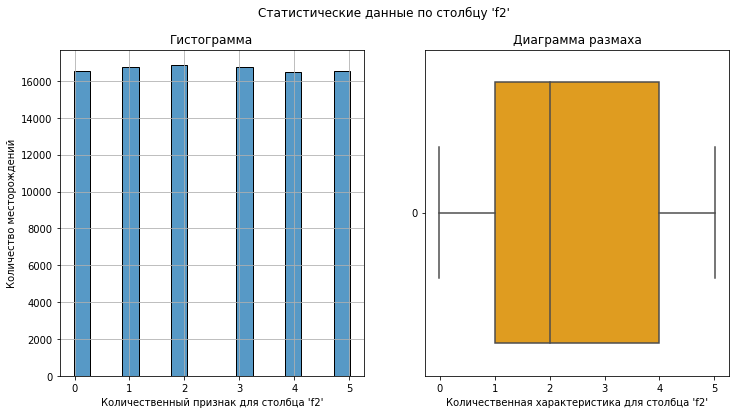

Рассмотрим описательную статистику:
count    99996.000000
mean         2.494551
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011479
75%          3.999904
max          5.019721
Name: f2, dtype: float64


In [38]:
# Строим график
graph_quant_feature(geo_data_2, 'f2', 'Статистические данные по столбцу \'f2\'')

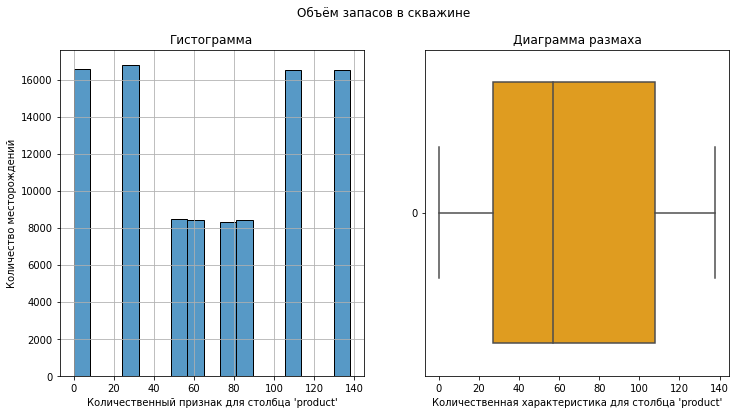

Рассмотрим описательную статистику:
count    99996.000000
mean        68.825232
std         45.944649
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64


In [39]:
# Строим график
graph_quant_feature(geo_data_2, 'product', 'Объём запасов в скважине')

Были проанализированы описательные статистики по всем данным 2-го региона. Согласно гистограмме, приблизительно нормальное распределение наблюдается только у признака *f1*. На диаграммах размаха признаков *f0* и *f1* выявлены выбросы. Гистограммы признаков *f2* и *product* по форме ближе к распределениям категориальных, а не количественных признаков.

#### Анализ данных 3-го региона

In [40]:
# Выводим общую информацию
geo_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [41]:
# Рассмотрим описательную статистику
geo_data_3.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.001995,-0.002034,2.495132,95.000425
std,1.732054,1.730424,3.473453,44.748112
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174805,0.130359,59.452094
50%,0.009411,-0.009433,2.484236,94.925613
75%,1.158477,1.163760,4.858720,130.590822
max,7.238262,7.844801,16.739402,190.029838


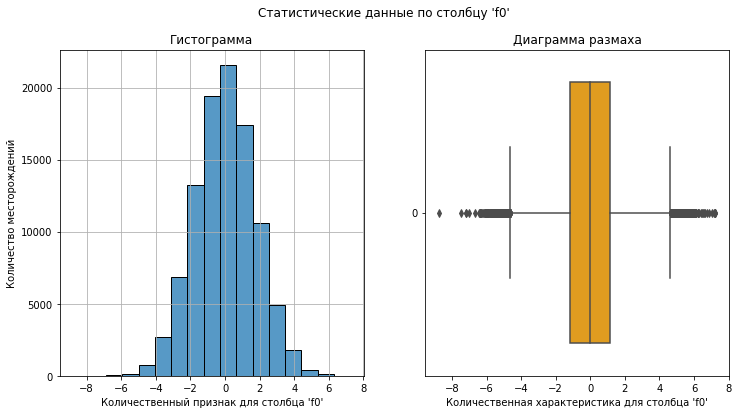

Рассмотрим описательную статистику:
count    99996.000000
mean         0.001995
std          1.732054
min         -8.760004
25%         -1.162288
50%          0.009411
75%          1.158477
max          7.238262
Name: f0, dtype: float64


In [42]:
# Строим график
graph_quant_feature(geo_data_3, 'f0', 'Статистические данные по столбцу \'f0\'')

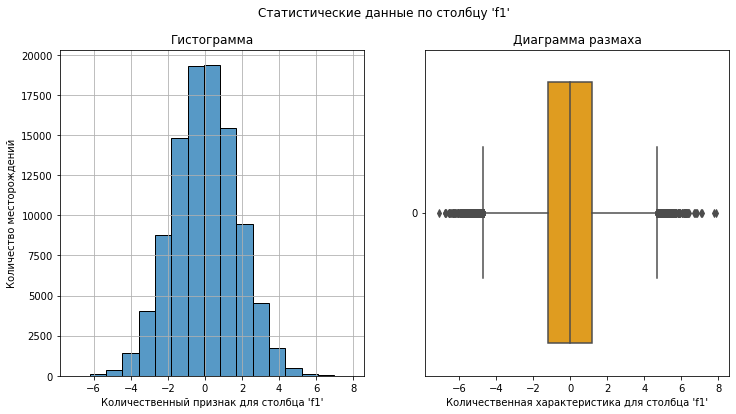

Рассмотрим описательную статистику:
count    99996.000000
mean        -0.002034
std          1.730424
min         -7.084020
25%         -1.174805
50%         -0.009433
75%          1.163760
max          7.844801
Name: f1, dtype: float64


In [43]:
# Строим график
graph_quant_feature(geo_data_3, 'f1', 'Статистические данные по столбцу \'f1\'')

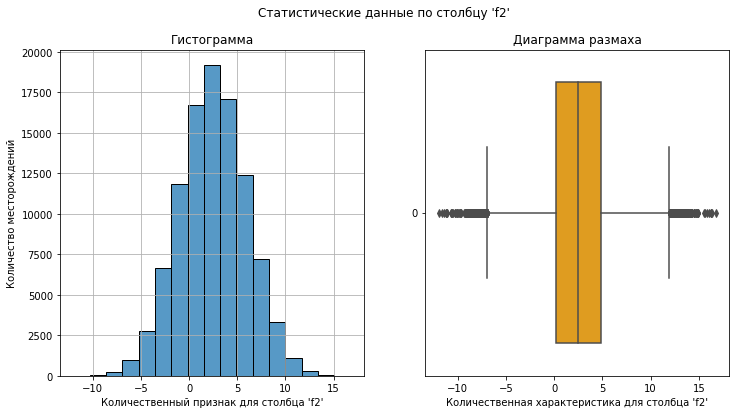

Рассмотрим описательную статистику:
count    99996.000000
mean         2.495132
std          3.473453
min        -11.970335
25%          0.130359
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64


In [44]:
# Строим график
graph_quant_feature(geo_data_3, 'f2', 'Статистические данные по столбцу \'f2\'')

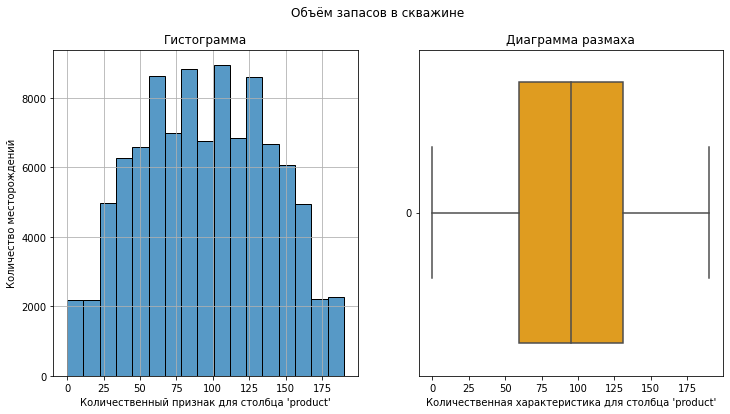

Рассмотрим описательную статистику:
count    99996.000000
mean        95.000425
std         44.748112
min          0.000000
25%         59.452094
50%         94.925613
75%        130.590822
max        190.029838
Name: product, dtype: float64


In [45]:
# Строим график
graph_quant_feature(geo_data_3, 'product', 'Объём запасов в скважине')

Были проанализированы описательные статистики по всем данным 3-го региона. Согласно гистограммам, приблизительно нормальное распределение наблюдается у всех признаков, за исключением *product*. На диаграммах размаха признаков *f0*, *f1* и *f2* выявлены выбросы.

### Корреляционный анализ

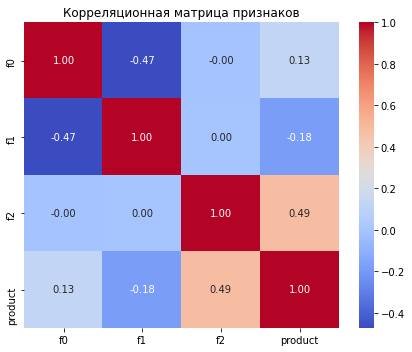

In [46]:
# Строим корреляционную матрицу для данных 1-го региона
corr_plot(geo_data_1)

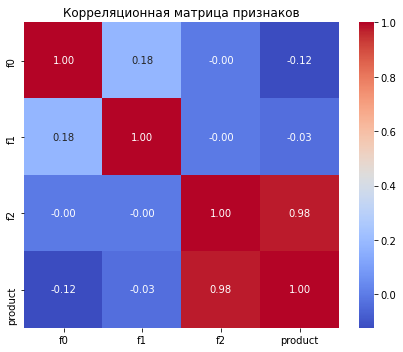

In [47]:
# Строим корреляционную матрицу для данных 2-го региона
corr_plot(geo_data_2)

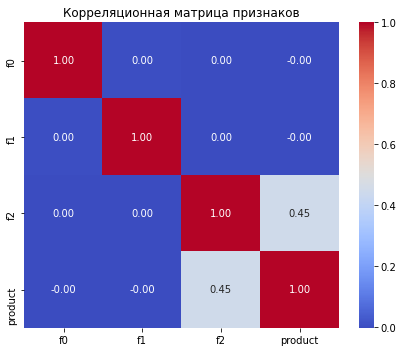

In [48]:
# Строим корреляционную матрицу для данных 3-го региона
corr_plot(geo_data_3)

Признаки *f0* и *f1* слабо коррелируют с целевым признаком *product*, тогда как *f2* оказывает на него сравнительно более сильное влияние. В случае данных 2-го региона коэффициент корреляции между *f2* и *product* равен 1.

### Вывод по разделу

- Были рассмотрены входные данные о месторождениях в трёх регионах.
- Пропущенные значения отсутствуют. Небольшое количество дубликатов по столбцу id (10, 6 и 6 для каждого из регионов соответственно) было удалено.
- Исследовательский анализ данных показал, что многие признаки не имеют нормального распределения, а также в данных присутствуют выбросы. Эти факторы могут негативно сказаться на качестве моделей линейной регрессии.
- Признаки f0 и f1 слабо коррелируют с целевым признаком product, тогда как f2 демонстрирует относительно более сильную зависимость.

## Обучение и проверка модели

In [49]:
# С помощью функции product_predict получаем предсказанное значение объёма запасов в скважине, 
# его фактическое значение, RMSE модели и средний запас предсказанного сырья
print('Для 1-го региона:')
y_pred_1, y_valid_1, rmse_1, avg_product_stock_1 = product_predict(geo_data_1)

print('Для 2-го региона:')
y_pred_2, y_valid_2, rmse_2, avg_product_stock_2 = product_predict(geo_data_2)

print('Для 3-го региона:')
y_pred_3, y_valid_3, rmse_3, avg_product_stock_3 = product_predict(geo_data_3)

Для 1-го региона:
Формы тренировочной и тестовой выборок:  (74992, 3) (24998, 3)
   y_pred  y_valid
0   85.82    46.42
1  119.65    77.33
2  117.03   149.72
3   78.88    93.44
4   96.90   127.21
RMSE: 37.81
Cредний запас предсказанного сырья: 92.37 

Для 2-го региона:
Формы тренировочной и тестовой выборок:  (74997, 3) (24999, 3)
   y_pred  y_valid
0    2.44     3.18
1   25.49    26.95
2   55.51    53.91
3   27.40    26.95
4    0.23     0.00
RMSE: 0.89
Cредний запас предсказанного сырья: 69.04 

Для 3-го региона:
Формы тренировочной и тестовой выборок:  (74997, 3) (24999, 3)
   y_pred  y_valid
0   76.06   131.92
1   90.06   165.46
2  120.63   102.11
3   63.22    34.08
4  141.18   138.08
RMSE: 40.14
Cредний запас предсказанного сырья: 94.92 



**Вывод по разделу:**
- В 1-м и 3-м регионах наблюдается высокий предсказанный средний запас (около 93 тыс. баррелей), однако значения RMSE (37.81 и 40.14 соответственно) также достаточно велики. Это, вероятно, связано с наличием большого количества выбросов в данных и слабой корреляцией между входными признаками и целевым признаком.
- Во 2-м регионе модель показала очень низкое значение RMSE (0.89), предсказав средний запас на уровне ~69 тыс. баррелей. Высокая точность предсказания, скорее всего, обусловлена сильной корреляцией признака f2 с целевой переменной.

## Подготовка к расчёту прибыли

In [50]:
# Сохраняем ключевые значения для расчётов
num_research_points = 500
num_best_points = 200
budget = 10 ** 10
income_per_unit = 450000

Чтобы выйти в безубыток, необходимо, чтобы совокупный доход от 200 точек как минимум покрывал общий бюджет

In [51]:
# Вычисляем достаточный объём сырья для безубыточной разработки новой скважины
sufficient_volume = budget / (income_per_unit * 200)
print('Достаточный объём сырья для безубыточной разработки новой скважины -', round(sufficient_volume, 2), 
      'тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины - 111.11 тыс. баррелей


Учитывая, что модель предсказала максимальный средний объём сырья для самого перспективного региона на уровне 94.92 тыс. баррелей, ни один из регионов не соответствует условию безубыточности

In [52]:
print(f'Регион 1: не хватает', round(sufficient_volume - avg_product_stock_1, 2), 'тыс. баррелей')
print(f'Регион 2: не хватает', round(sufficient_volume - avg_product_stock_2, 2), 'тыс. баррелей')
print(f'Регион 3: не хватает', round(sufficient_volume - avg_product_stock_3, 2), 'тыс. баррелей')

Регион 1: не хватает 18.75 тыс. баррелей
Регион 2: не хватает 42.07 тыс. баррелей
Регион 3: не хватает 16.19 тыс. баррелей


**Вывод по разделу:**
Во всех трёх регионах средний предсказанный объём добычи на одну скважину недостаточен для выхода проекта на безубыточность. Разница между требуемым и фактическим объёмом составляет:
- для 1-го региона — 18.75 тыс. баррелей,
- для 2-го региона — 42.07 тыс. баррелей,
- для 3-го региона — 16.19 тыс. баррелей.

## Расчёт прибыли и рисков 

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [53]:
# Рассчитываем прибыль по выбранным скважинам для 1-го региона
print('Прибыль в 1-м регионе составила:', 
      round(calculate_profit(y_pred_1, y_valid_1, num_best_points, income_per_unit, budget),2), 'руб.')

Прибыль в 1-м регионе составила: 3594247240.81 руб.


In [54]:
# Рассчитываем прибыль по выбранным скважинам для 2-го региона
print('Прибыль во 2-м регионе составила:', 
      round(calculate_profit(y_pred_2, y_valid_2, num_best_points, income_per_unit, budget),2), 'руб.')

Прибыль во 2-м регионе составила: 2415086696.68 руб.


In [55]:
# Рассчитываем прибыль по выбранным скважинам для 3-го региона
print('Прибыль в 3-м регионе составила:', 
      round(calculate_profit(y_pred_3, y_valid_3, num_best_points, income_per_unit, budget),2), 'руб.')

Прибыль в 3-м регионе составила: 2427999783.94 руб.


Прибыль в каждом из регионов превышает 10 миллиардов рублей.

Посчитаем риски убытков и среднюю прибыль для каждого региона

In [56]:
# С помощью функции regional_analytics выводим все основные данные для каждого района
regional_analytics(y_pred_1, y_valid_1, num_best_points, income_per_unit, budget, num_research_points, 1)
regional_analytics(y_pred_2, y_valid_2, num_best_points, income_per_unit, budget, num_research_points, 2)
regional_analytics(y_pred_3, y_valid_3, num_best_points, income_per_unit, budget, num_research_points, 3)

Регион 1:
Средняя прибыль: 397966606.96 руб.
95%-й доверительный интервал: [-107956506.89; 899629462.1] руб.
Риск убытков: 7.60%

Регион 2:
Средняя прибыль: 453499017.82 руб.
95%-й доверительный интервал: [75988886.28; 826565157.87] руб.
Риск убытков: 0.60%

Регион 3:
Средняя прибыль: 335371203.5 руб.
95%-й доверительный интервал: [-159804812.84; 870123195.63] руб.
Риск убытков: 9.80%



**Вывод по разделу:**
- Выполнен расчёт прибыли на основе фактических запасов сырья в топ-200 месторождениях с наибольшими предсказанными значениями. Эти данные показывают, что отобранные месторождения окупают затраты на разработку, поскольку прибыль во всех случаях превышает 10 миллиардов рублей.
- С учётом проверки на случайных выборках (Bootstrap-анализа), для бурения новых скважин рекомендуется выбрать второй регион, так как только он соответствует критерию: вероятность убытков составляет менее 2.5%.

## Общий вывод

В исследовании использовались данные о 100000 скважин в трёх регионах, включающие уникальный идентификатор, объём запасов сырья (целевой признак) и три признака, потенциально влияющих на объём добычи. Пропущенных значений не обнаружено, но были удалены дубликаты по столбцу *id* (в количестве 10, 6 и 6 соответственно для регионов 1, 2 и 3).

На основе анализа данных и построения моделей линейной регрессии, только второй регион показал высокую точность предсказаний и минимальный риск убытков. Несмотря на то что средний запас на одну скважину недостаточен для безубыточности во всех регионах, расчёт по топ-200 месторождениям с наибольшим предсказанным потенциалом показал положительную прибыль. Учитывая результаты Bootstrap-анализа, к разработке рекомендуется 2-й регион — как наиболее надёжный и прибыльный.